<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-gerardoaaron_castanedajaramillo/blob/main/Actividad%20Semanal%20--%207%20K%20means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerardo Aaron Castañeda Jaramillo - A01137646

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 603 kB/s 
     |████████████████████████████████| 1.0 MB 57.6 MB/s 
     |████████████████████████████████| 1.7 MB 45.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 44.4 MB/s 
     |████████████████████████████████| 6.3 MB 47.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7a979b0f1322b9d3602a5cc4fa02aa67fcbf97b4adc3796c070d712fd5fe379d
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=52360afcba581fa5fead26869624ecf816f43516d0086fbbf4b6907248cb0dd5
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

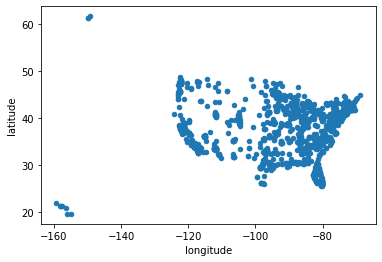

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

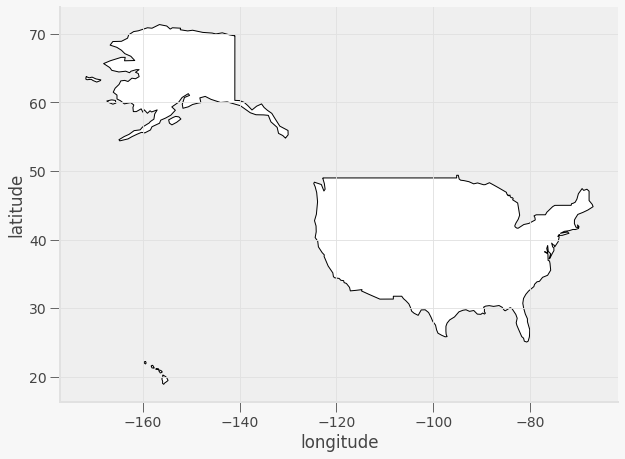

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

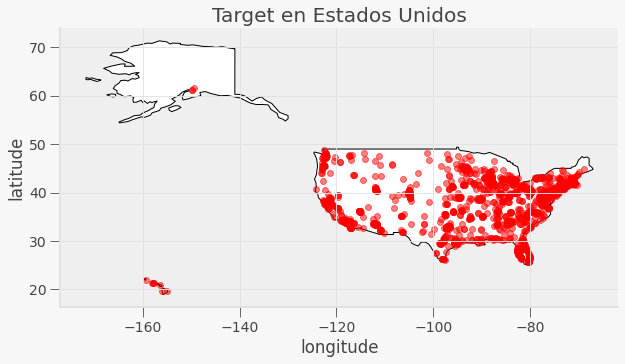

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

### Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estara?

In [16]:
from sklearn.cluster import KMeans

Para determinar cuantas tiendas va a surtir cada almacene, podemos evaluar la distancia mínima promedio entre la cantidad de tiendas y la cantidad de almacenes. 

In [17]:
from sklearn.externals._packaging.version import Infinity
import math

Generamos una función para determinar la distancia mínima promedio en base a la cantidad de tiendas y un numero N de almacenes: 

Iteramos de almacenes = 1 a 37, donde 37 equivale a la (cantidad de tiendas)/50, siendo 50 un numero arbitrario de 50 tiendas por almacén:

In [106]:
X = list(zip(gdf.longitude, df.latitude))
N_max = 37

avgdist = list()
inertias = list()

for N in range(1,N_max):
  kmeans = KMeans(n_clusters=N)
  kmeans.fit(X)
  inertias.append([N,kmeans.inertia_])

La métrica de inertia equivale a la suma de las distancias al cuadrado de cada instancia y de su centroide mas cercano. Así que la graficamos de acuerdo al número de almacenes:

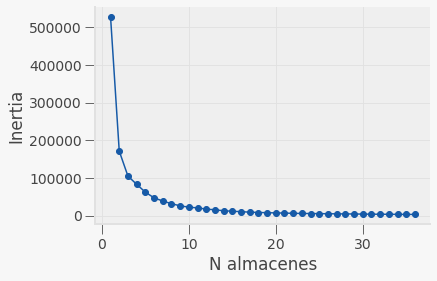

In [107]:
plt.plot(pd.DataFrame(inertias)[0], pd.DataFrame(inertias)[1], '-o')
plt.xlabel('N almacenes')
plt.ylabel('Inertia')

plt.show()

A simple vista podemos ver que entre mayor la cantidad de numero de almacenes, esta métrica disminuye. Y efectivamente, si tuviéramos un almacén a lado de cada tienda tendríamos una inercia equivalente a 0. Pero esto no es practico. Lo que podemos hacer es con que cantidad de almacenes, al aumentarlos, deja de hacer mucha diferencia en la inertia.  Donde concluimos que a partir de una cantidad de almacenes mayor a 10, cada almacén agregado no genera un cambio significativo en nuestra métrica. 

Y ahora buscamos la distancia mínima, y el numero de almacenes que la otorga:

Obtenemos la longitud y latitud de la GeoDataFrame:

Aplicamos el método de KMean y encontramos los centros. Aplicamos un total de 10 almacenes.

In [110]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

Lo graficamos, donde los puntos rojos son las tiendas, y los negros los almacenes sugeridos:

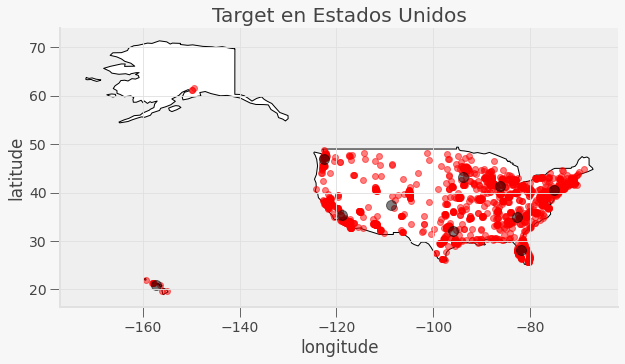

In [111]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Donde observamos que Alaska se queda sin almacén, por lo que probamos aumentando a 1 almacén más. 

Aplicamos el método de KMean y encontramos los centros. Aplicamos un total de 11 almacenes.

In [134]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

Lo graficamos, donde los puntos rojos son las tiendas, y los negros los almacenes sugeridos:

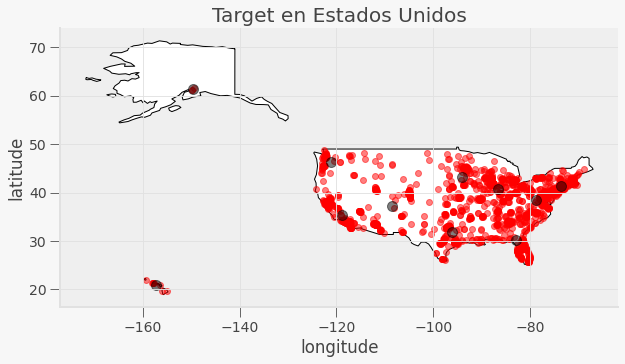

In [135]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Y finalmente tenemos un total de 11 almacenes, donde esta incluida la zona de Alaska. 

* Longitudes y latitudes de los 11 almacenes:

In [136]:
centers

array([[ -82.79527868,   30.23350034],
       [-108.52442323,   37.22723067],
       [ -78.74595717,   38.50398159],
       [ -93.95262114,   43.18760768],
       [-118.92569852,   35.41108603],
       [ -96.1699054 ,   31.80793043],
       [ -86.69026677,   40.71133858],
       [-157.31225085,   20.94542771],
       [-121.15506338,   46.25476682],
       [-149.6767927 ,   61.31264473],
       [ -73.65439441,   41.3122448 ]])

* ¿Que ciudad es?

In [137]:
from geopy.geocoders import Nominatim

In [138]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [139]:
indx = 0
for warehouse in centers:
  Latitude = warehouse[1]
  Longitude = warehouse[0]
  location = geolocator.reverse(str(Latitude)+','+str(Longitude))
  address = location.raw['address']
  city = address.get('city')
  state = address.get('state')
  country = address.get('country')
  zipcode = address.get('postcode')
  print(indx, ')', 'City:', city, 'State:', state, 'Country:', country, 'Zip Code:', zipcode, 'Coordinates:', Latitude,',',Longitude)
  indx = indx + 1

0 ) City: None State: Florida Country: United States Zip Code: 32094 Coordinates: 30.23350033870968 , -82.79527867695852
1 ) City: None State: Colorado Country: United States Zip Code: None Coordinates: 37.227230668749996 , -108.52442323046874
2 ) City: None State: Virginia Country: United States Zip Code: 22802 Coordinates: 38.50398158583333 , -78.74595716916666
3 ) City: None State: Iowa Country: United States Zip Code: 50484 Coordinates: 43.18760767785235 , -93.9526211409396
4 ) City: Bakersfield State: California Country: United States Zip Code: 93306 Coordinates: 35.41108603027523 , -118.92569851788991
5 ) City: None State: Texas Country: United States Zip Code: None Coordinates: 31.8079304254902 , -96.16990539656862
6 ) City: None State: Indiana Country: United States Zip Code: 47960 Coordinates: 40.71133857955975 , -86.69026677358491
7 ) City: None State: None Country: United States Zip Code: None Coordinates: 20.945427712500003 , -157.31225085
8 ) City: None State: Washington C

Donde podemos ver que muchos almacenes quedan fuera de ciudades, pero para fines el ejercicio, nos arroja en que estado estan

Funciones para generar las "Decision Boundaries":

In [142]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

Y los generamos:

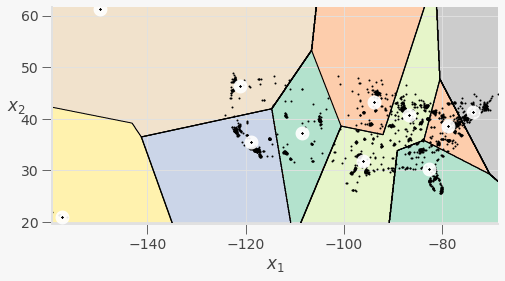

In [141]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, np.array(X))
plt.show()

* ¿A cuantas tiendas va surtir?

In [143]:
np.bincount(y_kmeans)

array([218, 128, 240, 149, 218, 204, 317,   8,  74,   3, 280])

Donde podemos ver a cuantas tiendas surte cada almacén. Y donde resaltan los almacenes que surten únicamente 8 y 3 tiendas. De los cuales se hablará en las conclusiones.

* ¿Sabes a que distancia estara?

Podemos usar el método de transform para obtener la distancia de cada punto, a cada almacen:

In [151]:
kmeans.transform(np.array(X)).round(2)[0]

array([ 5.  , 22.09,  9.63, 12.26, 32.2 ,  9.47,  7.49, 71.57, 36.74,
       68.86, 15.44])

In [149]:
min(kmeans.transform(np.array(X))[0]).round(2)

5.0

Donde observamos las distancias, en magnitudes de longitud y latitud, de la tienda con índice 0, a cada almacén. Resultando el almacén más cercano, el de índice 0 con una distancia de 5. 

Así mismo, la intertia equivale a la suma de las distancias al cuadrado de cada instancia y de su centroide más cercano. Lo cual es una métrica que nos ayuda a evaluar las distancias de todas las tiendas a sus almacenes. 

In [148]:
kmeans.inertia_

19276.490632750894

### ¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?

Existen diferentes posibles acercamientos a este problema. En este caso, se decidió trabajar con la métrica de intertia como su principal factor para tomar decisión, y seguido la visualización de los almacenes en el mapa. Observando la grafica de Numero de almacenes vs inertia, se observa que entre mas almacenes tengamos, menor la suma de las distancias al cuadrado de cada instancia y de su centroide mas cercano. Y entre menor distancia, menor el costo de transporte, horas hombre, etc.  Efectivamente, si cada tienda tuviera un almacén alado, nuestra métrica de inertia seria muy cercana a 0. Sin embargo, no es practico. Por lo que se opto por tomar una decisión en base a cuando el agregar un almacén, dejara de dar una mejora de nuestra métrica significativa. Viendo la gráfica mencionada, observamos que esto podía ser aproximadamente entre 10 almacenes.  

Sin embargo, al graficar nuestros 10 almacenes en el mapa, junto con las tiendas, se pudo visualizar que Alaska se quedaba sin almacén. Se decidió aumentar a 11 almacenes, lo cual ya nos genero un cluster dentro de Alaska. 

Esto ya sería una decisión a tomar para target sobre que es mejor respecto a costo. Enviar desde un almacén lejano los productos necesarios para 3 tiendas (podemos ver con bincount cuantas tiendas se le asignaron al cluster), o construir un almacén que solo alimente a 3 tiendas. Por fines del ejercicio, se decidió tener un cluster que alimentara a esas 3 tiendas. 

Por lo que al final, terminamos con 11 almacenes, que alimentan cada uno a:

In [155]:
np.bincount(y_kmeans)

array([218, 128, 240, 149, 218, 204, 317,   8,  74,   3, 280])

### Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, despues nos auxiliamos de una librería de datos geograficos.
### ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

Algunos posibles ejemplos son:
1. Arcpy
2. Geopandas
3. GDAL/OGR
4. RSGISLib
5. PyProj
6. ReportLab
7. ipyleaflet
8. Folium
9. Geemap
10. LiDAR

### ¿Consideras importante que se grafique en un mapa?, ¿por qué?

Si, si lo considero importante. Poder visualizar ayuda tremendamente a comprender cualquier tipo de datos. Incluidos datos con referencias geográficas. Teniendo mejor comprensión de los datos, se pueden tomar mejores decisiones. Así como conocer el posible impacto de ellas. 

### Agrega las conclusiones

Este ejercicio fue bastante clarificador. Se vio el tema de KMeans, así como visualización de datos en mapas. KMeans es un algoritmo de clustering que computa centroides iterando hasta encontrar su centroide optimo. Verlo en un caso aplicado ayudo bastante a su comprensión. Así mismo, ver ejemplos de como graficar mapas, y ubicar puntos en ellos es definitivamente conocimiento muy útil. 

Buscar la cantidad optima de almacenes para la cantidad y posición de tiendas de target puede tener diferentes criterios. En este caso, se decidió trabajar con la métrica de intertia como su principal factor para tomar decisión, y seguido la visualización de los almacenes en el mapa. Obteniendo así un total de 11 almacenes. 


Referencias:
* Satyam, K. (2022, May 31). Get the city, state, and country names from latitude and longitude using Python. Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/
* Trencseni, M. (2018, September 26). Warehouse locations with k-means. Retrieved from Bytepawn: https://bytepawn.com/warehouse-locations-with-kmeans.html

